In [63]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_excel("sample-superstore-subset-excel.xlsx")
print(df.head(5))

# Display the first few rows and summary statistics

df.describe()

   Row ID Order Priority  Discount  Unit Price  Shipping Cost  Customer ID  \
0   18606  Not Specified      0.01        2.88           0.50            2   
1   20847           High      0.01        2.84           0.93            3   
2   23086  Not Specified      0.03        6.68           6.15            3   
3   23087  Not Specified      0.01        5.68           3.60            3   
4   23088  Not Specified      0.00      205.99           2.50            3   

     Customer Name    Ship Mode Customer Segment Product Category  ...  \
0  Janice Fletcher  Regular Air        Corporate  Office Supplies  ...   
1    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
2    Bonnie Potter  Express Air        Corporate  Office Supplies  ...   
3    Bonnie Potter  Regular Air        Corporate  Office Supplies  ...   
4    Bonnie Potter  Express Air        Corporate       Technology  ...   

    Region State or Province       City  Postal Code Order Date  Ship Date  \
0  Centr

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426,9426,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,2012-03-05 18:33:59.465308672,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272,82318.489073
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,2010-01-01 00:00:00,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,2011-03-07 06:00:00,2011-03-09 00:00:00,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2012-04-08 00:00:00,2012-04-09 00:00:00,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,2013-03-26 00:00:00,2013-03-28 00:00:00,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2013-12-31 00:00:00,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000,91591.000000
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,NaN,NaN,998.486483,15.107688,2598.019818,19149.448857


In [64]:

# Handle missing values
df_mv = (df.isnull().sum()/(len(df)))*100
print(df_mv)
print(df.shape)
pbs_median = df["Product Base Margin"].median()
df["Product Base Margin"] = df["Product Base Margin"].replace(np.nan,pbs_median)
# Convert data types if necessary
print(df.dtypes)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
# Create any new columns needed for analysis
# Create a 'Total Price' column: Final sales amount after discount
df.loc[:, 'Total Price'] = df['Sales'] - (df['Sales'] * df['Discount'])
# Create a 'Profit Margin' column in percentage
df.loc[:, 'Profit Margin'] = (df['Profit'] / df['Sales']) * 100


Row ID                  0.000000
Order Priority          0.000000
Discount                0.000000
Unit Price              0.000000
Shipping Cost           0.000000
Customer ID             0.000000
Customer Name           0.000000
Ship Mode               0.000000
Customer Segment        0.000000
Product Category        0.000000
Product Sub-Category    0.000000
Product Container       0.000000
Product Name            0.000000
Product Base Margin     0.763845
Region                  0.000000
State or Province       0.000000
City                    0.000000
Postal Code             0.000000
Order Date              0.000000
Ship Date               0.000000
Profit                  0.000000
Quantity ordered new    0.000000
Sales                   0.000000
Order ID                0.000000
dtype: float64
(9426, 24)
Row ID                           int64
Order Priority                  object
Discount                       float64
Unit Price                     float64
Shipping Cost             

In [65]:
#Missing data is handled
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Total Price             0
Profit Margin           0
dtype: int64

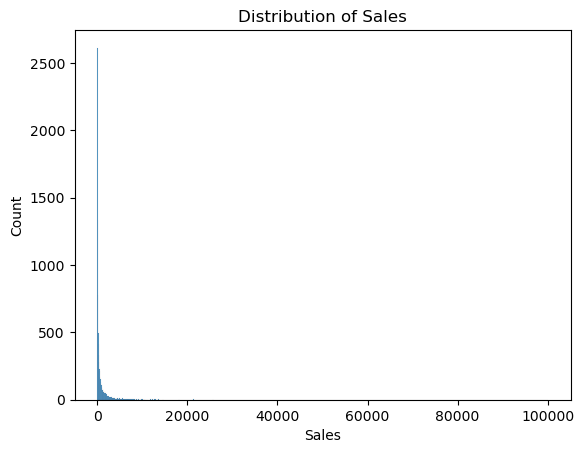

In [66]:
#Univariate analysis 
#histogram also showing y axis frequency for that reason we use this 
# histogram showing how much normal our data for this reason going this plot 
sns.histplot(x="Sales",data=df)
plt.title("Distribution of Sales")
plt.show()

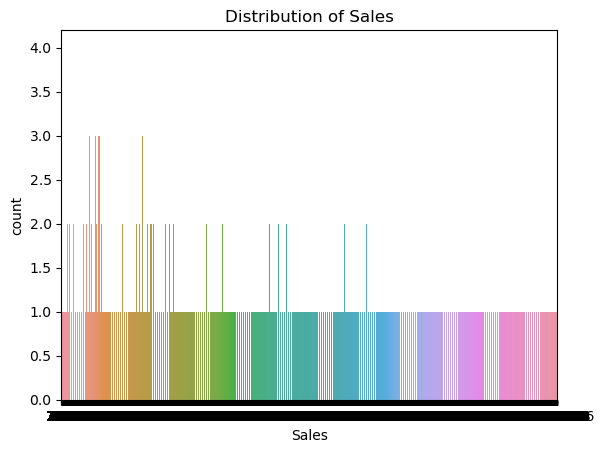

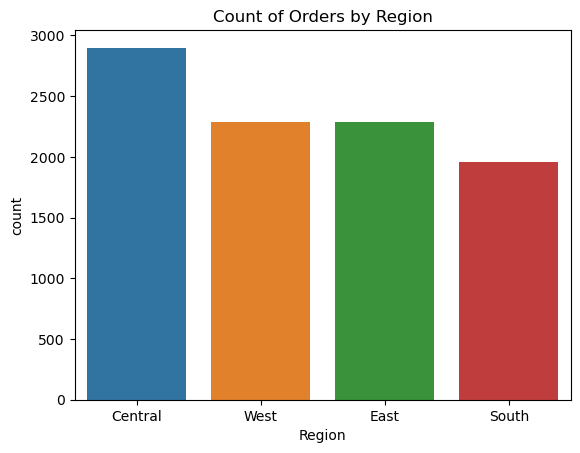

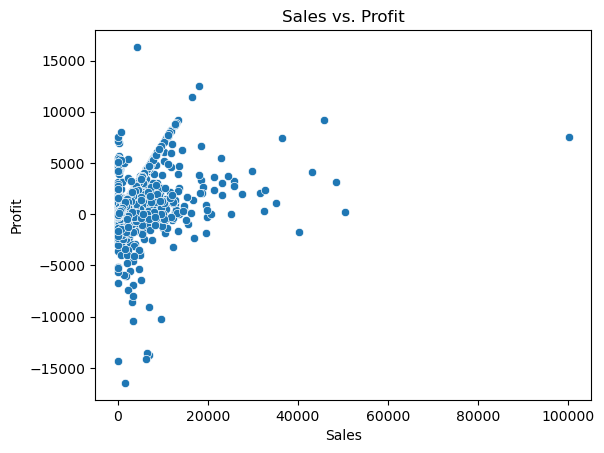

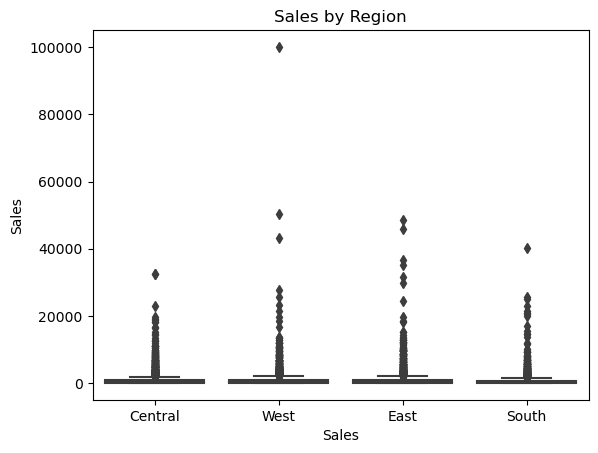

In [67]:

# Univariate analysis
# countplot showing the column respective how much count of rows.
# Countplot simply means layman can understand data analysis.
#Univariate analysis means simply study with one columns 

sns.countplot(x="Sales",data=df)
plt.title("Distribution of Sales")
plt.show()

sns.countplot(x="Region",data=df)
plt.title("Count of Orders by Region")
plt.show()

# Bivariate analysis
#Scatter plot using for x respect to y how much increasing
sns.scatterplot(x="Sales",y="Profit",data=df)
plt.title("Sales vs. Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()
# boxplot
#most common use of this boxplot is detecting outliers
sns.boxplot(x="Region",y="Sales",data=df)
plt.xlabel("Region")
plt.xlabel("Sales")
plt.title("Sales by Region")
plt.show()

#differenc between univariate and bivariate 
# In Univariate we study one column study
# In Bivariate we study two column study
# this difference can understand everyone




In [68]:
# Descriptive Statistics : Mean, median, Mode showing Central tendency of data. 
# Standard Deviation and Range is showing how data spread from the Centre of data
mean = df['Total Price'].mean()
median = df['Total Price'].median()
mode = df['Total Price'].mode()[0]
std_dev = df['Total Price'].std()
data_range = df['Total Price'].max() - df['Total Price'].min()

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Range: {data_range:.2f}")

Mean: 904.33
Median: 193.65
Mode: 19.07
Standard Deviation: 2486.59
Range: 97114.40


In [69]:
# Summary statistics for key variables
#summary showing the where data stands its mean : 'Tendency of data','Spread of data'
spqd_df = df[["Sales","Profit","Quantity ordered new", "Discount"]]
print(spqd_df.describe())

# Grouped statistics
#Grouped analysis is very much needed understand for key columns 
# In this data Sales and profit is important columns to understand data how sales is happens with repect to regions
# which category mean value profit is happening in the data
grouped = df.groupby('Region')
Sales_by_Region = grouped['Sales'].sum()
print("Sales_Region:\n", Sales_by_Region)
#Product category with respect to profit
grouped_pc = df.groupby('Product Category')
Profit_by_Category = grouped_pc['Profit'].mean()
print("Profit_Category:\n", Profit_by_Category)

               Sales        Profit  Quantity ordered new     Discount
count    9426.000000   9426.000000           9426.000000  9426.000000
mean      949.706272    139.236410             13.798430     0.049628
std      2598.019818    998.486483             15.107688     0.031798
min         1.320000 -16476.838000              1.000000     0.000000
25%        61.282500    -74.017375              5.000000     0.020000
50%       203.455000      2.567600             10.000000     0.050000
75%       776.402500    140.243850             17.000000     0.080000
max    100119.160000  16332.414000            170.000000     0.250000
Sales_Region:
 Region
Central    2540341.62
East       2422804.68
South      1597346.22
West       2391438.80
Name: Sales, dtype: float64
Profit_Category:
 Product Category
Furniture           91.750801
Office Supplies     87.239957
Technology         295.457563
Name: Profit, dtype: float64



### Conclusion

- Summary of key findings.
- Insights based on the analysis.



## Additional Statistical Analysis


In [70]:

from scipy.stats import ttest_ind, chi2_contingency

# Example: T-test for sales in different regions
# for this i use F statistics means anova for better prediction 
# for Oneway test is better for this data analysis
from scipy import stats


 #Group sales data by region
central_sales = df[df['Region'] == 'Central']['Sales']
west_sales = df[df['Region'] == 'West']['Sales']
east_sales = df[df['Region'] == 'East']['Sales']
south_sales = df[df['Region'] == 'South']['Sales']

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(central_sales, west_sales, east_sales, south_sales)

print(f"F-Statistic: {f_statistic:.2f}, P-Value: {p_value:.4f}")
#Interpretation
if p_value < 0.05:
    print("Significant difference in sales among regions")
else:
    print("No significant difference in sales among regions")

# Example: Chi-square test for independence between Ship Mode and Customer Segment
contingency_table = pd.crosstab(df['Ship Mode'], df['Customer Segment'])

print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between Ship Mode and Customer Segment.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Ship Mode and Customer Segment.")




F-Statistic: 4.87, P-Value: 0.0022
Significant difference in sales among regions
Contingency Table:
Customer Segment  Consumer  Corporate  Home Office  Small Business
Ship Mode                                                         
Delivery Truck         263        465          299             256
Express Air            222        398          267             220
Regular Air           1409       2512         1750            1365

Chi-Square Statistic: 1.65
P-Value: 0.9487
Degrees of Freedom: 6
Expected Frequencies:
[[ 257.79779334  459.38096754  315.23742839  250.58381074]
 [ 222.43348186  396.36378103  271.99363463  216.20910248]
 [1413.7687248  2519.25525143 1728.76893698 1374.20708678]]
Fail to reject the null hypothesis: There is no significant association between Ship Mode and Customer Segment.


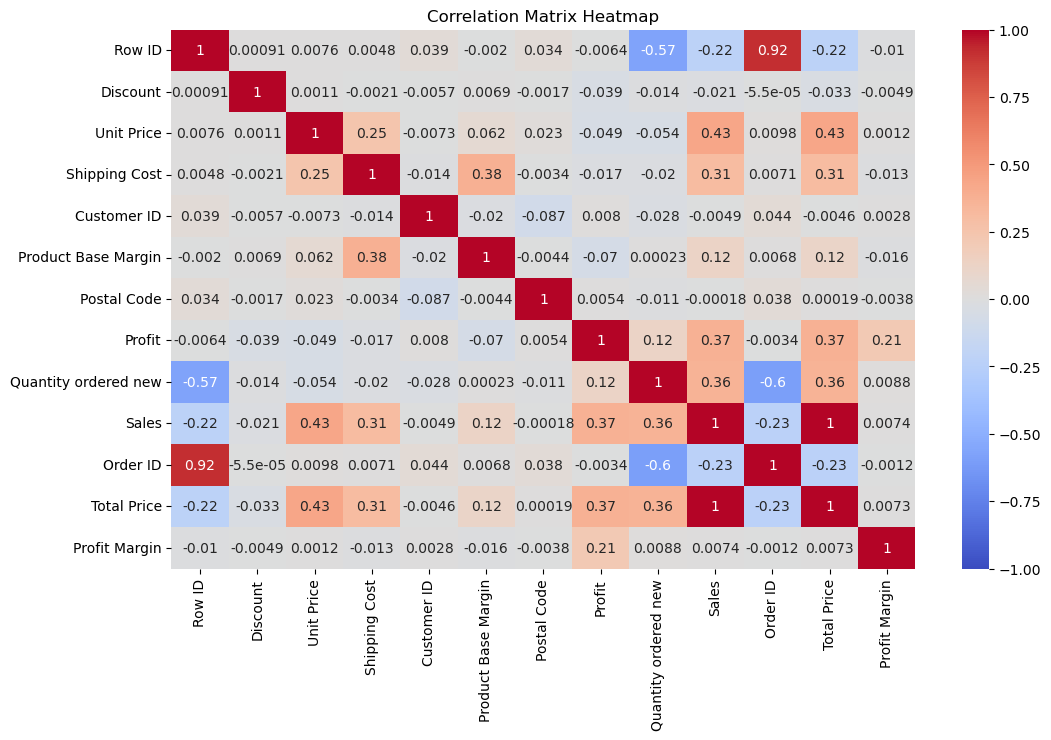

In [76]:
#Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)
# Draw the heatmap
plt.figure(figsize=(12,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [78]:
df['Month']= df['Ship Date']
grouped_shd = df.groupby('Ship Date')
Sales_by_shipdate = grouped_shd['Sales'].sum()
print("Sales_Shipdate:\n", Sales_by_shipdate)

Sales_Shipdate:
 Ship Date
2010-01-02     1396.33
2010-01-03      193.88
2010-01-04     4675.93
2010-01-05     1399.01
2010-01-06     3465.37
                ...   
2013-12-30    14475.93
2014-01-02     3626.49
2014-01-14     9375.35
2014-01-15     4529.95
2014-01-17        9.64
Name: Sales, Length: 1450, dtype: float64


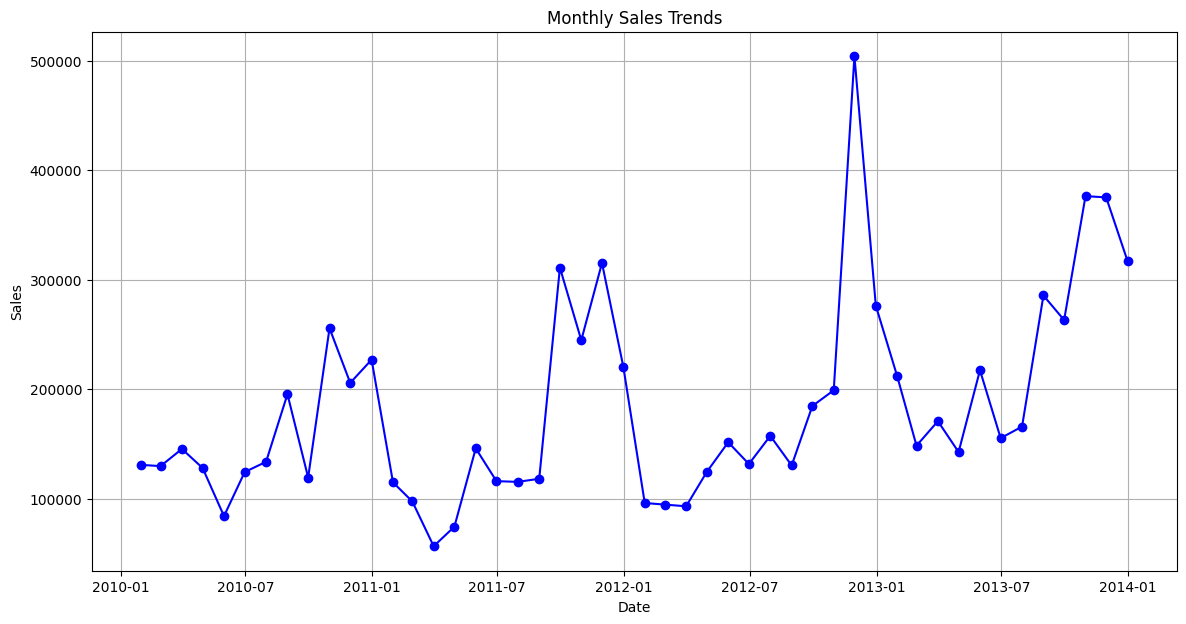

In [ ]:

# Plotting sales trends over time



# Resample sales data by month







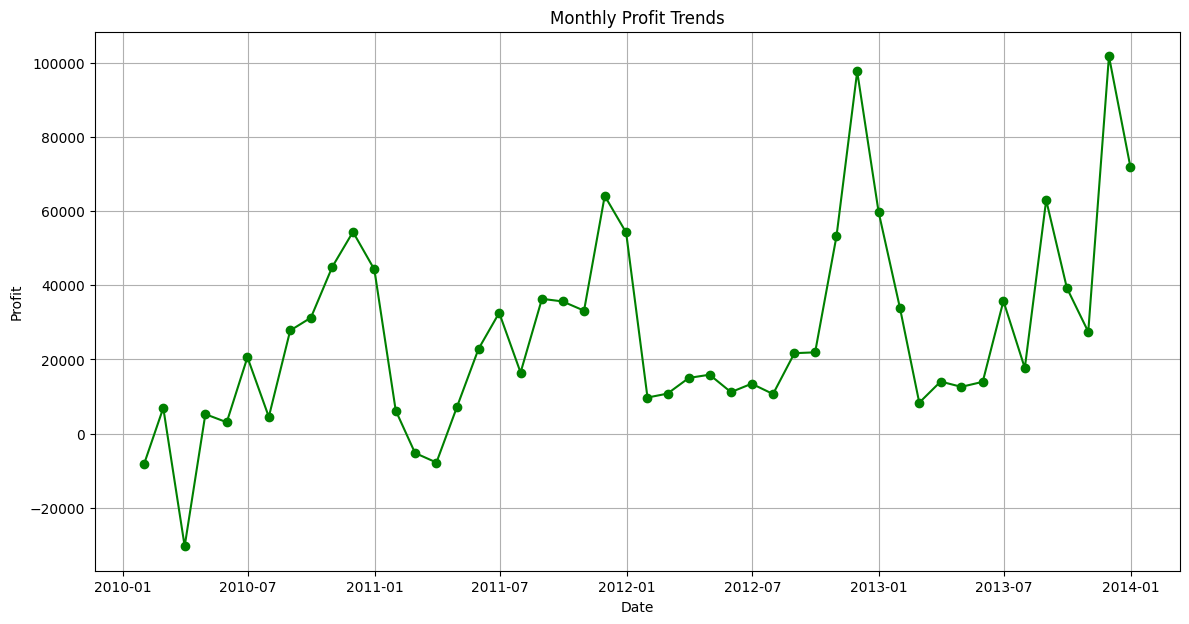

In [ ]:

# Plotting profit trends over time








Sales by Product:
 Product Category
Furniture          3178623.74
Office Supplies    2258325.55
Technology         3514982.03
Name: Sales, dtype: float64


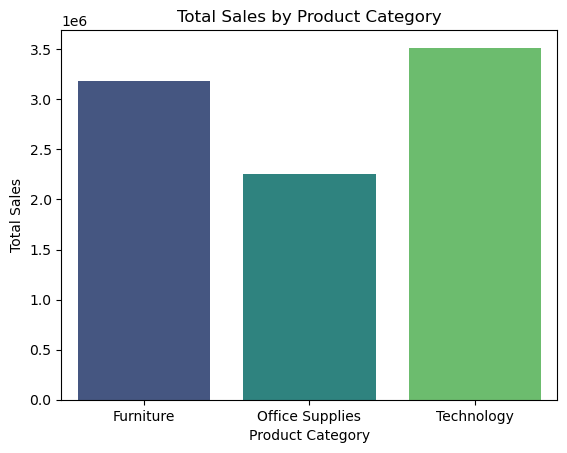

Profit by Product:
 Product Category
Furniture          177354.298188
Office Supplies    451990.216492
Technology         683097.884748
Name: Profit, dtype: float64


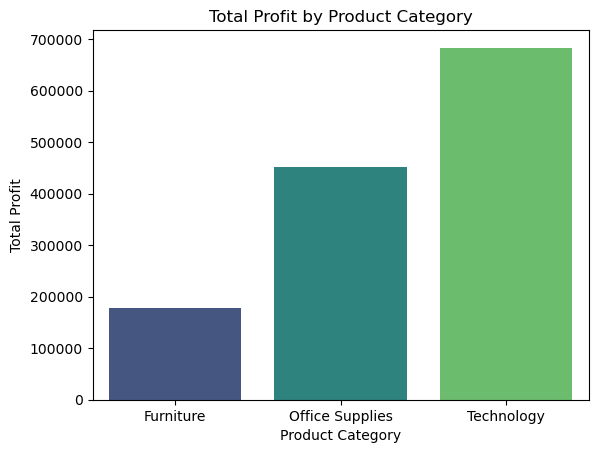

In [79]:

# Identifying top-performing product categories based on total sales and profit

# Calculate total Profit for each Product category
grouped_pct = df.groupby('Product Category')
sales_by_product = grouped_pct['Sales'].sum()
print("Sales by Product:\n", sales_by_product)

# Plotting total sales by product category
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()


# Calculate total Profit for each Product category
grouped_pctp = df.groupby('Product Category')
profit_by_product = grouped_pctp['Profit'].sum()
print("Profit by Product:\n", profit_by_product)
# Plotting total profit by product category
sns.barplot(x=profit_by_product.index, y=profit_by_product.values, palette='viridis')
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()








In [80]:

# Generating summary statistics for each region

region_statistics = df.groupby("Region").describe()


# Display summary statistics

print(region_statistics)


         Row ID                                                            \
          count          mean    min       25%      50%      75%      max   
Region                                                                      
Central  2899.0  21009.057261   52.0  19692.50  21825.0  24161.5  26387.0   
East     2289.0  19120.730887    2.0  18709.00  21421.0  23779.0  26389.0   
South    1954.0  21172.882805  257.0  19770.75  21986.5  24323.0  26399.0   
West     2284.0  19591.675569   64.0  18973.00  21346.0  23897.5  26397.0   

                     Discount            ... Profit Margin              Month  \
                 std    count      mean  ...           max          std count   
Region                                   ...                                    
Central  5031.383479   2899.0  0.049348  ...      69.00000   151.087968  2899   
East     7195.690558   2289.0  0.050000  ...      69.00000   157.587085  2289   
South    4947.572889   1954.0  0.049401  ...   99998.30

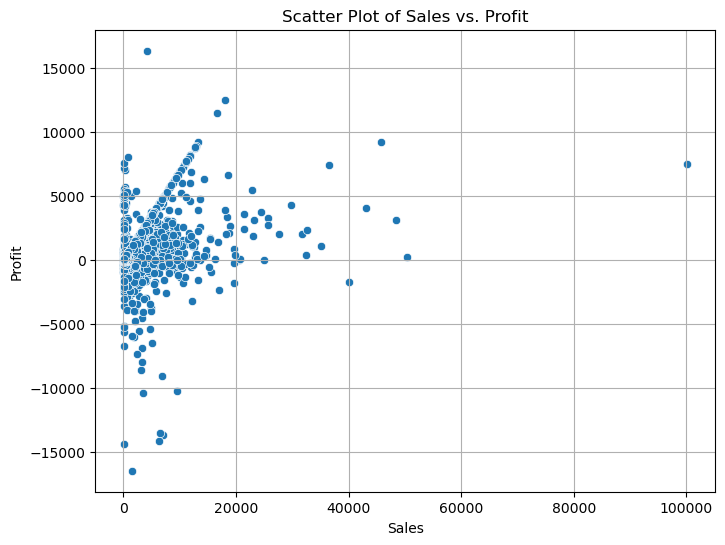

Correlation Coefficient between Sales and Profit: 0.3715830697718411


In [81]:

# Visualizing the correlation between sales and profit
# Calculate the correlation coefficient between Sales and Profit
# Correlation matrix showing relation between one variable to another variable
# lets understand with one eg as environment humid, high temperature its rain was coming this shows positive correlation
correlation_coefficient = df['Sales'].corr(df['Profit'])


# Visualize the correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Scatter Plot of Sales vs. Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()
# Displaying the correlation coefficient 
print("Correlation Coefficient between Sales and Profit:", correlation_coefficient)

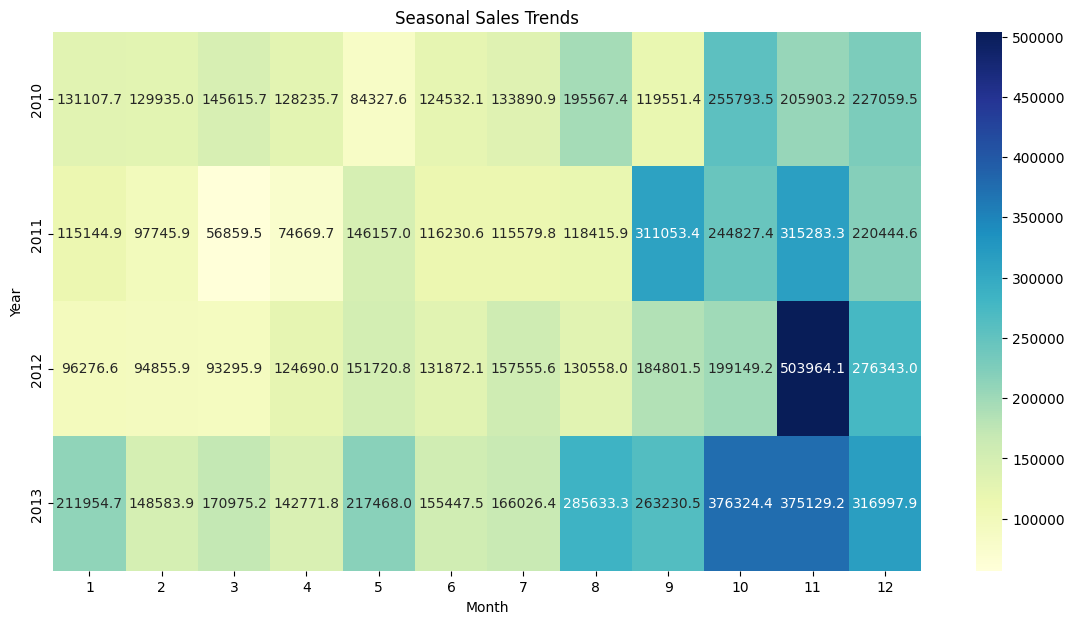

In [ ]:

# Analyzing seasonal sales trends




# Grouping sales data by month and year



# Plotting seasonal sales trends









Sales by Ship Mode:
 Ship Mode
Delivery Truck    3706516.02
Express Air        701756.34
Regular Air       4543658.96
Name: Sales, dtype: float64


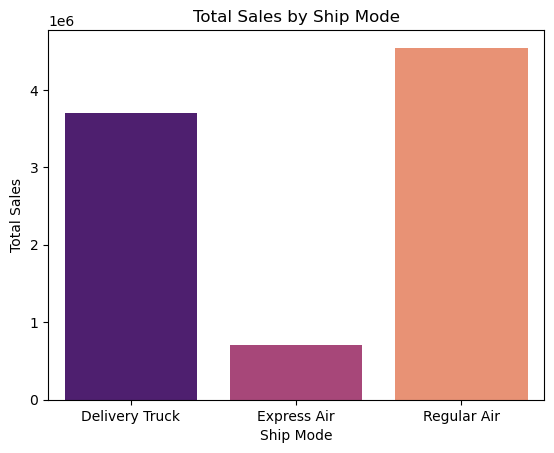

In [82]:

# Comparing sales across different ship modes
grouped = df.groupby('Ship Mode')

# Calculate total sales for each ship mode
sales_by_ship_mode = grouped['Sales'].sum()
print("Sales by Ship Mode:\n", sales_by_ship_mode)
#plot
sns.barplot(x=sales_by_ship_mode.index, y=sales_by_ship_mode.values, palette='magma')
plt.title('Total Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.show()





Column Names: Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Ship Date', 'Profit', 'Quantity ordered new',
       'Sales', 'Order ID', 'Order Month', 'Order Year'],
      dtype='object')


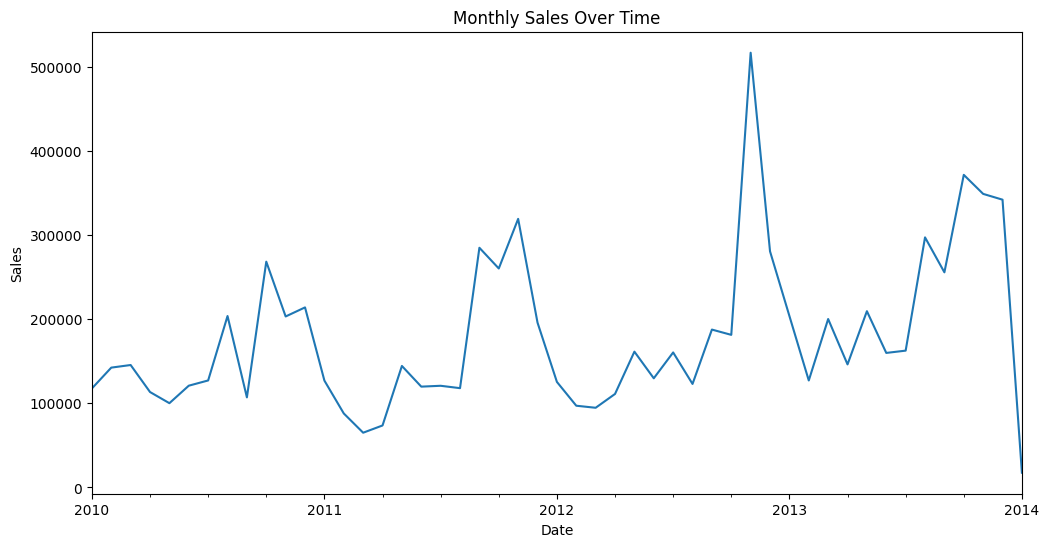

In [ ]:
# Ensure column names are clean


# Print column names to verify


# Ensure 'Ship Date' column is datetime type


# Dropping rows where 'Ship Date' couldn't be converted


# Resample sales data by month











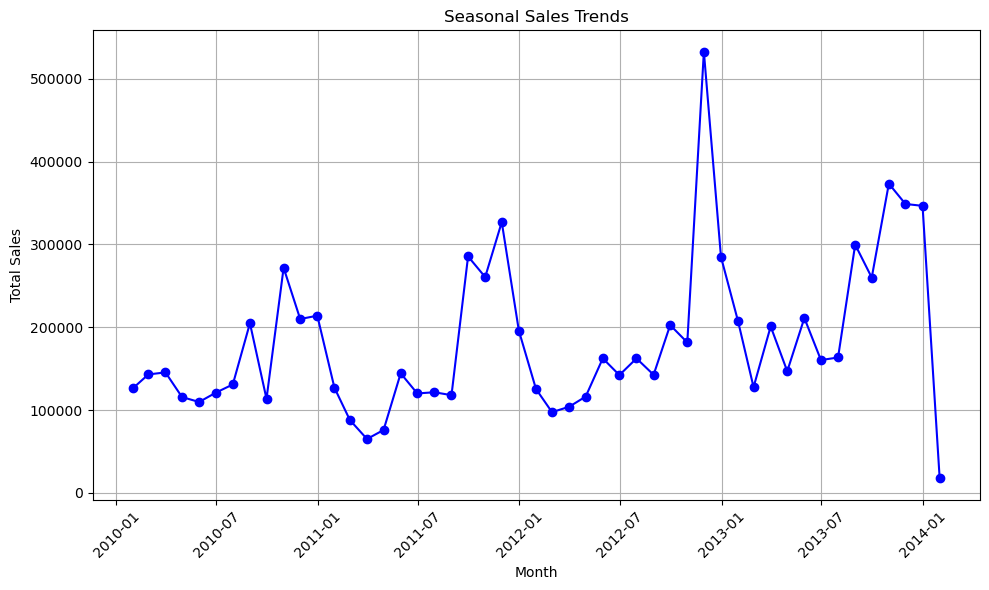

In [41]:
# Grouping sales data by month and year
df.set_index('Ship Date',inplace=True)
monthly_sales = df.resample('M')['Sales'].sum()

# Plotting seasonal sales trends
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, marker='o', linestyle='-', color='b')
plt.title('Seasonal Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()